In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df13 = pd.read_csv('cgss2013.csv',
                   sep='\t', lineterminator='\r')

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,249,568,569,570,571,572,573,574,575,576,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,595,596,597,598,599,600,601,602,603,604,605,607,608,609,610,611,612,613,614,615,616,617,618,619,621,622,623,624,625,626,627,628,629,630,631,634,635,636,638,640,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,678,679,680,681,682,683,684,685,687,688,690,691,692,693,694,695,696,697,698,699,700,702,703,704,705,706,707,709,710) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df13.head()

,id,s41,s42,s43,s44,s45,vilorngh,s5a,s5b,a1102,...,indrp2,iscorp2,indsp,iscosp,inddad,iscodad,indmom,iscomom,dataversion,weight
0,2,19.0,56.0,90.0,218.0,308.0,1.0,5.0,7.0,,...,,6100,,,101.0,6111.0,101.0,6111.0,6.0,2.603428
1,3,19.0,56.0,90.0,219.0,310.0,2.0,1.0,1.0,??,...,317,7430,1184,5141,101.0,6111.0,101.0,6111.0,6.0,1.301714
2,5,19.0,56.0,90.0,219.0,309.0,1.0,5.0,7.0,??,...,,,337,4211,315.0,8279.0,318.0,7432.0,6.0,0.867809
3,6,19.0,56.0,90.0,219.0,309.0,1.0,5.0,7.0,,...,,,,,101.0,6111.0,101.0,6111.0,6.0,2.603428
4,7,19.0,56.0,90.0,219.0,309.0,1.0,5.0,7.0,??,...,,6100,,,9999.0,9999.0,101.0,6111.0,6.0,0.650857


In [4]:
df13me1 = df13.loc[:,['s5a','a3a','a4','a7a','a8a','a10','a43d',
                      'a59f','a59k','a89b','a89c',
                      'a89f','a89g','a90b','a90c',
                      'a90f','a90g']] \
.rename(columns = {'s5a':'sitetype', 'a3a':'birth',
                 'a4':'ethnic','a7a':'educ',
                  'a8a':'income','a10':'party',
                 'a43d':'class14','a59f':'mnglvl01',
                 'a59k':'wkunit01', 'a89b':'f_educ',
                 'a89c':'f_poltc', 'a89f':'f_mnglv',
                 'a89g':'f_wkunit', 'a90b':'m_educ',
                 'a90c':'m_poltc', 'a90f':'m_mnglv',
                 'a90g':'m_wkunit'})

In [5]:
df13me1.head()

,sitetype,birth,ethnic,educ,income,party,class14,mnglvl01,wkunit01,f_educ,f_poltc,f_mnglv,f_wkunit,m_educ,m_poltc,m_mnglv,m_wkunit
0,5.0,1937.0,1.0,1.0,10000.0,4.0,2.0,,,1.0,4.0,0,5,1.0,4.0,0,5
1,1.0,1971.0,1.0,3.0,0.0,4.0,1.0,,,3.0,4.0,0,5,3.0,4.0,0,5
2,5.0,1980.0,1.0,5.0,30000.0,4.0,5.0,3,3,3.0,4.0,0,2,3.0,4.0,0,2
3,5.0,1947.0,1.0,3.0,3600.0,4.0,1.0,3,,1.0,4.0,0,5,1.0,4.0,0,5
4,5.0,1945.0,1.0,1.0,4680.0,4.0,2.0,,,1.0,4.0,,,1.0,4.0,0,5


In [6]:
def site(x):
    if float(x) < 0:
        return 1
    elif float(x) == 1:
        return 5
    elif float(x) == 2:
        return 4
    elif float(x) == 3:
        return 3
    elif float(x) == 4:
        return 2
    else:
        return 1

In [7]:
df13me1['sitetype'].apply(lambda x : site(x)).describe()

count    11439.000000
mean         3.027275
std          1.786504
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: sitetype, dtype: float64

In [8]:
df13me1['sitetype'] = df13me1['sitetype'].apply(lambda x : site(x)).fillna(3)

In [9]:
def income(x):
    if x == -3 or x == -2 or x == -1:
        return np.nan
    elif x < 0:
        return 0
    elif x > 9999995:
        return 0
    else:
        return x

In [10]:
df13me1['income'].apply(lambda x : income(x)).describe()

count      11438.000000
mean       21326.384508
std        35534.896288
min            0.000000
25%         1800.000000
50%        12000.000000
75%        30000.000000
max      1000000.000000
Name: income, dtype: float64

In [11]:
df13me1['income'] = df13me1['income']. \
                   apply(lambda x : income(x)).fillna(21326)

In [12]:
def age(x):
    try:
        float(x)
    except:
        return np.NaN
    else:
        if float(x) > 0:
            return (2013 - float(x))
        else:
            return np.NaN

In [13]:
df13me1['birth'].apply(lambda x : age(x)).describe()

count    11437.000000
mean        48.597359
std         16.388160
min         17.000000
25%         36.000000
50%         48.000000
75%         61.000000
max         97.000000
Name: birth, dtype: float64

In [14]:
df13me1['age'] = df13me1['birth']. \
                   apply(lambda x : age(x)).fillna(48)
df13me1['age'].describe()

count    11439.000000
mean        48.597255
std         16.386729
min         17.000000
25%         36.000000
50%         48.000000
75%         61.000000
max         97.000000
Name: age, dtype: float64

In [15]:
def ethni(x):
    try:
        float(x)
    except:
        return np.nan
    else:
        if float(x) == 1:
            return 1
        else:
            return 0

In [16]:
df13me1['ethnic'].apply(lambda x : ethni(x)).describe()

count    11439.000000
mean         0.914241
std          0.280020
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ethnic, dtype: float64

In [17]:
df13me1['ethnic'] = df13me1['ethnic'].apply(lambda x : ethni(x)).fillna(1)

In [18]:
df13me1['f_poltc'].apply(lambda x : ethni(x)).describe()

count    11439.000000
mean         0.124836
std          0.330547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: f_poltc, dtype: float64

In [19]:
df13me1['f_poltc'] = df13me1['f_poltc'].apply(lambda x : ethni(x)).fillna(0)

In [20]:
df13me1['m_poltc'].apply(lambda x : ethni(x)).describe()

count    11439.000000
mean         0.020369
std          0.141265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: m_poltc, dtype: float64

In [21]:
df13me1['m_poltc'] = df13me1['m_poltc'].apply(lambda x : ethni(x)).fillna(0)

In [22]:
df13me1['party'].apply(lambda x : ethni(x)).describe()

count    11439.000000
mean         0.101495
std          0.301996
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: party, dtype: float64

In [23]:
df13me1['party'] = df13me1['party'].apply(lambda x : ethni(x)).fillna(0)

In [24]:
df13me1.describe()

,sitetype,birth,ethnic,educ,income,party,class14,f_educ,f_poltc,m_educ,m_poltc,age
count,11439.000000,11438.000000,11439.000000,11438.000000,11439.000000,11439.000000,11438.000000,11438.000000,11439.000000,11438.000000,11439.000000,11439.000000
mean,3.027275,1964.230635,0.914241,4.899808,21326.384474,0.101495,3.033922,2.725389,0.124836,2.114968,0.020369,48.597255
std,1.786504,24.636416,0.280020,3.058452,35533.342884,0.301996,1.845782,2.341382,0.330547,1.899591,0.141265,16.386729
min,1.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,-3.000000,-3.000000,0.000000,-3.000000,0.000000,17.000000
25%,1.000000,1952.000000,1.000000,3.000000,1800.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,36.000000
50%,3.000000,1965.000000,1.000000,4.000000,12000.000000,0.000000,3.000000,3.000000,0.000000,1.000000,0.000000,48.000000
75%,5.000000,1977.000000,1.000000,6.000000,30000.000000,0.000000,4.000000,4.000000,0.000000,3.000000,0.000000,61.000000
max,5.000000,1996.000000,1.000000,14.000000,1000000.000000,1.000000,10.000000,14.000000,1.000000,14.000000,1.000000,97.000000


In [25]:
df13dsc = df13me1.describe()

In [26]:
df13dsc.to_excel('df13dsc.xls')

In [27]:
df13me1.head()

,sitetype,birth,ethnic,educ,income,party,class14,mnglvl01,wkunit01,f_educ,f_poltc,f_mnglv,f_wkunit,m_educ,m_poltc,m_mnglv,m_wkunit,age
0,1,1937.0,1,1.0,10000.0,0,2.0,,,1.0,0,0,5,1.0,0,0,5,76.0
1,5,1971.0,1,3.0,0.0,0,1.0,,,3.0,0,0,5,3.0,0,0,5,42.0
2,1,1980.0,1,5.0,30000.0,0,5.0,3,3,3.0,0,0,2,3.0,0,0,2,33.0
3,1,1947.0,1,3.0,3600.0,0,1.0,3,,1.0,0,0,5,1.0,0,0,5,66.0
4,1,1945.0,1,1.0,4680.0,0,2.0,,,1.0,0,,,1.0,0,0,5,68.0


In [28]:
df13me1['class14'].describe()

count    11438.000000
mean         3.033922
std          1.845782
min         -3.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: class14, dtype: float64

In [29]:
def class14(x):
    if x < 0:
        return np.nan
    else:
        return x

In [30]:
df13me1['class14'].apply(lambda x : class14(x)).describe()

count    11353.000000
mean         3.073813
std          1.793422
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: class14, dtype: float64

In [31]:
df13me1['class14'] = df13me1['class14'].apply(lambda x : class14(x)).fillna(3)

In [32]:
def mng(x):
    try:
        float(x) or int(x)
    except:
        return np.nan
    else:
        if float(x) < 0:
            return np.nan
        elif float(x) == 1:
            return 4
        elif float(x) == 2:
            return 3
        elif float(x) == 3:
            return 2
        elif float(x) == 4:
            return 1

In [33]:
def mngm(x):
    try:
        float(x) or int(x)
    except:
        return np.nan
    else:
        if float(x) < 0:
            return np.nan
        else:
            return float(x)

In [34]:
df13me1['f_mnglv'].apply(lambda x : mngm(x)).describe()

count    10439.000000
mean         0.368809
std          0.829847
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: f_mnglv, dtype: float64

In [35]:
df13me1['f_mnglv'] = df13me1['f_mnglv'].apply(lambda x : mngm(x)).fillna(0)

In [36]:
df13me1['m_mnglv'].apply(lambda x : mngm(x)).describe()

count    9074.000000
mean        0.254794
std         0.500514
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: m_mnglv, dtype: float64

In [37]:
df13me1['m_mnglv'] = df13me1['m_mnglv'].apply(lambda x : mngm(x)).fillna(0)

In [38]:
df13me1['mnglvl01'].apply(lambda x : mng(x)).describe()

count    4589.000000
mean        2.097625
std         0.798356
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: mnglvl01, dtype: float64

In [39]:
df13me1['mnglvl01'] = df13me1['mnglvl01'].apply(lambda x : mng(x)).fillna(2)

In [40]:
def wkunit(x):
    try: 
        float(x)
    except:
        return 6
    else:
        if float(x) < 0:
            return 6
        else:
            return float(x)

In [41]:
#dummy
df13me1['wkunit01'] = df13me1['wkunit01'].apply(lambda x : wkunit(x)).fillna(6)

In [42]:
df13me1['f_wkunit'] = df13me1['f_wkunit'].apply(lambda x : wkunit(x)).fillna(6)
df13me1['m_wkunit'] = df13me1['m_wkunit'].apply(lambda x : wkunit(x)).fillna(6)

In [43]:
df13me1['wkunit01'].describe()

count    11439.000000
mean         5.104117
std          1.687694
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: wkunit01, dtype: float64

In [44]:
def educ(x):
    if float(x) == 14 or float(x) < 0:
        return 0
    elif float(x) == 2:
        return 5
    else:
        return float(x)    

In [45]:
df13me1['educ'].apply(lambda x : educ(x)).describe()

count    11438.000000
mean         4.931282
std          3.038329
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         13.000000
Name: educ, dtype: float64

In [46]:
df13me1['educ'] = df13me1['educ'].apply(lambda x : educ(x)).fillna(5)

In [47]:
df13me1['f_educ'].apply(lambda x : educ(x)).describe()

count    11438.000000
mean         2.990820
std          2.260588
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: f_educ, dtype: float64

In [48]:
df13me1['f_educ'] = df13me1['f_educ'].apply(lambda x : educ(x)).fillna(3)

In [49]:
df13me1['m_educ'].apply(lambda x : educ(x)).describe()

count    11438.000000
mean         2.239028
std          1.881292
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         13.000000
Name: m_educ, dtype: float64

In [50]:
df13me1['m_educ'] = df13me1['m_educ'].apply(lambda x : educ(x)).fillna(2)

In [51]:
#histogram
sns.distplot(df03me1['income']);

NameError: name 'df03me1' is not defined

In [52]:
df13me1['educ'].corr(df13me1['f_educ'])

0.48339717577850183

In [53]:
df13me1['educ'].corr(df13me1['m_educ'])

0.5166120343398326

In [54]:
df13me1 = df13me1.drop(columns
             = 'birth')

In [55]:
df13me1['ethnic'].describe()

count    11439.000000
mean         0.914241
std          0.280020
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ethnic, dtype: float64

In [57]:
df13dsc = df13me1.describe()

In [58]:
df13dsc.to_excel('df13dsc.xls')

In [56]:
df13me1.std()

sitetype        1.786504
ethnic          0.280020
educ            3.038196
income      35533.342884
party           0.301996
class14         1.786678
mnglvl01        0.507890
wkunit01        1.687694
f_educ          2.260489
f_poltc         0.330547
f_mnglv         0.799557
f_wkunit        1.357985
m_educ          1.881211
m_poltc         0.141265
m_mnglv         0.457563
m_wkunit        1.112464
age            16.386729
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c19a3f0d0>,
      dtype=object)

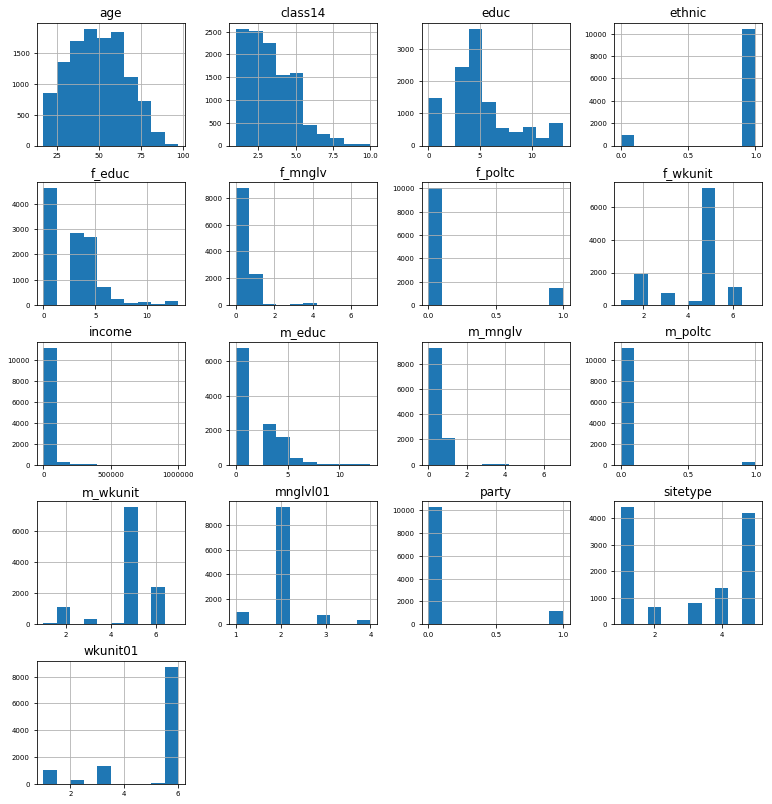

In [57]:
df13me1.hist(xlabelsize=7,ylabelsize=7,figsize=(13,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21a63fd0>,
      dtype=object)

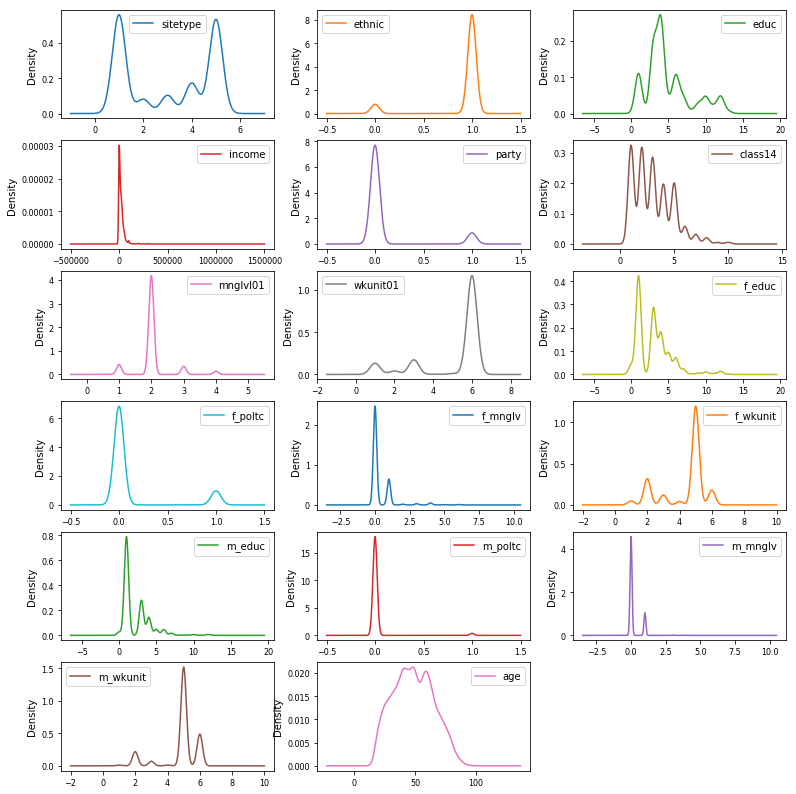

In [58]:
df13me1.plot(kind='density', subplots=True, layout=(6,3), sharex=False,fontsize=8,figsize=(13,14))

In [59]:
dummy_ranks = pd.get_dummies(df13me1['wkunit01'], prefix='wkunit')
dummy_ranks.head()

,wkunit_1.0,wkunit_2.0,wkunit_3.0,wkunit_4.0,wkunit_5.0,wkunit_6.0
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [60]:
dummy_ranksf = pd.get_dummies(df13me1['f_wkunit'], prefix='f_wkunit')
dummy_ranksf.head()

,f_wkunit_1.0,f_wkunit_2.0,f_wkunit_3.0,f_wkunit_4.0,f_wkunit_5.0,f_wkunit_6.0,f_wkunit_7.0
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


In [61]:
dummy_ranksm = pd.get_dummies(df13me1['m_wkunit'], prefix='m_wkunit')
dummy_ranksm.head()

,m_wkunit_1.0,m_wkunit_2.0,m_wkunit_3.0,m_wkunit_4.0,m_wkunit_5.0,m_wkunit_6.0,m_wkunit_7.0
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [62]:
df13me1.head()

,sitetype,ethnic,educ,income,party,class14,mnglvl01,wkunit01,f_educ,f_poltc,f_mnglv,f_wkunit,m_educ,m_poltc,m_mnglv,m_wkunit,age
0,1,1,1.0,10000.0,0,2.0,2.0,6.0,1.0,0,0.0,5.0,1.0,0,0.0,5.0,76.0
1,5,1,3.0,0.0,0,1.0,2.0,6.0,3.0,0,0.0,5.0,3.0,0,0.0,5.0,42.0
2,1,1,5.0,30000.0,0,5.0,2.0,3.0,3.0,0,0.0,2.0,3.0,0,0.0,2.0,33.0
3,1,1,3.0,3600.0,0,1.0,2.0,6.0,1.0,0,0.0,5.0,1.0,0,0.0,5.0,66.0
4,1,1,1.0,4680.0,0,2.0,2.0,6.0,1.0,0,0.0,6.0,1.0,0,0.0,5.0,68.0


In [69]:
keep = ['x','income','sitetype','age','ethnic','educ','party',
        'class14','mnglvl01','f_educ','f_poltc','f_mnglv',
       'm_educ','m_poltc','m_mnglv']

In [64]:
std = ['sitetype','age','ethnic','educ','party',
       'f_educ','f_poltc','f_unitrk','f_hktype',
       'm_educ','m_poltc','m_unitrk','m_hktype']

In [65]:
names = ['income','sitetype','age','ethnic','educ','party',
         'class14','mnglvl01','f_educ','f_poltc','f_mnglv',
         'm_educ','m_poltc','m_mnglv','wkunit_1.0',
         'wkunit_2.0','wkunit_3.0','wkunit_4.0','wkunit_5.0',
         'wkunit_6.0','f_wkunit_1.0','f_wkunit_2.0',
         'f_wkunit_3.0','f_wkunit_4.0','f_wkunit_5.0',
         'f_wkunit_6.0','f_wkunit_7.0','m_wkunit_1.0',
         'm_wkunit_2.0','m_wkunit_3.0','m_wkunit_4.0',
         'm_wkunit_5.0','m_wkunit_6.0','m_wkunit_7.0']

In [70]:
df13std = df13me1[keep].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [71]:
data = df13std.join(dummy_ranks)
datam = data.join(dummy_ranksm)
dataf = datam.join(dummy_ranksf)
print dataf.head()

          x   income  sitetype     age  ethnic      educ  party   class14  \
0  0.004699  0.01000       0.0  0.7375     1.0  0.076923    0.0  0.111111   
1  0.000000  0.00000       1.0  0.3125     1.0  0.230769    0.0  0.000000   
2  0.032468  0.03000       0.0  0.2000     1.0  0.384615    0.0  0.444444   
3  0.001948  0.00360       0.0  0.6125     1.0  0.230769    0.0  0.000000   
4  0.002458  0.00468       0.0  0.6375     1.0  0.076923    0.0  0.111111   

   mnglvl01    f_educ      ...       m_wkunit_5.0  m_wkunit_6.0  m_wkunit_7.0  \
0  0.333333  0.076923      ...                  1             0             0   
1  0.333333  0.230769      ...                  1             0             0   
2  0.333333  0.230769      ...                  0             0             0   
3  0.333333  0.076923      ...                  1             0             0   
4  0.333333  0.076923      ...                  1             0             0   

   f_wkunit_1.0  f_wkunit_2.0  f_wkunit_3.0  f_wku

In [72]:
df2 = dataf.rename(columns={'m_wkunit_1.0':'mw_government',
       'm_wkunit_2.0':'mw_company','m_wkunit_3.0':'mw_institution',
       'm_wkunit_4.0':'mw_socialgroup','m_wkunit_5.0':'mw_selfemployed',
       'm_wkunit_6.0':'mw_army','m_wkunit_7.0':'mw_others',
       'f_wkunit_1.0':'fw_government','f_wkunit_2.0':'fw_company',
       'f_wkunit_3.0':'fw_institution','f_wkunit_4.0':'fw_socialgroup',
       'f_wkunit_5.0':'fw_selfemployed',
       'f_wkunit_6.0':'fw_army','f_wkunit_7.0':'fw_others',
       'wkunit_1.0':'w_stateowend','wkunit_2.0':'w_collective',
        'wkunit_3.0':'w_private','wkunit_4.0':'w_hkmctw',
        'wkunit_5.0':'w_foreign','wkunit_6.0':'w_others'})

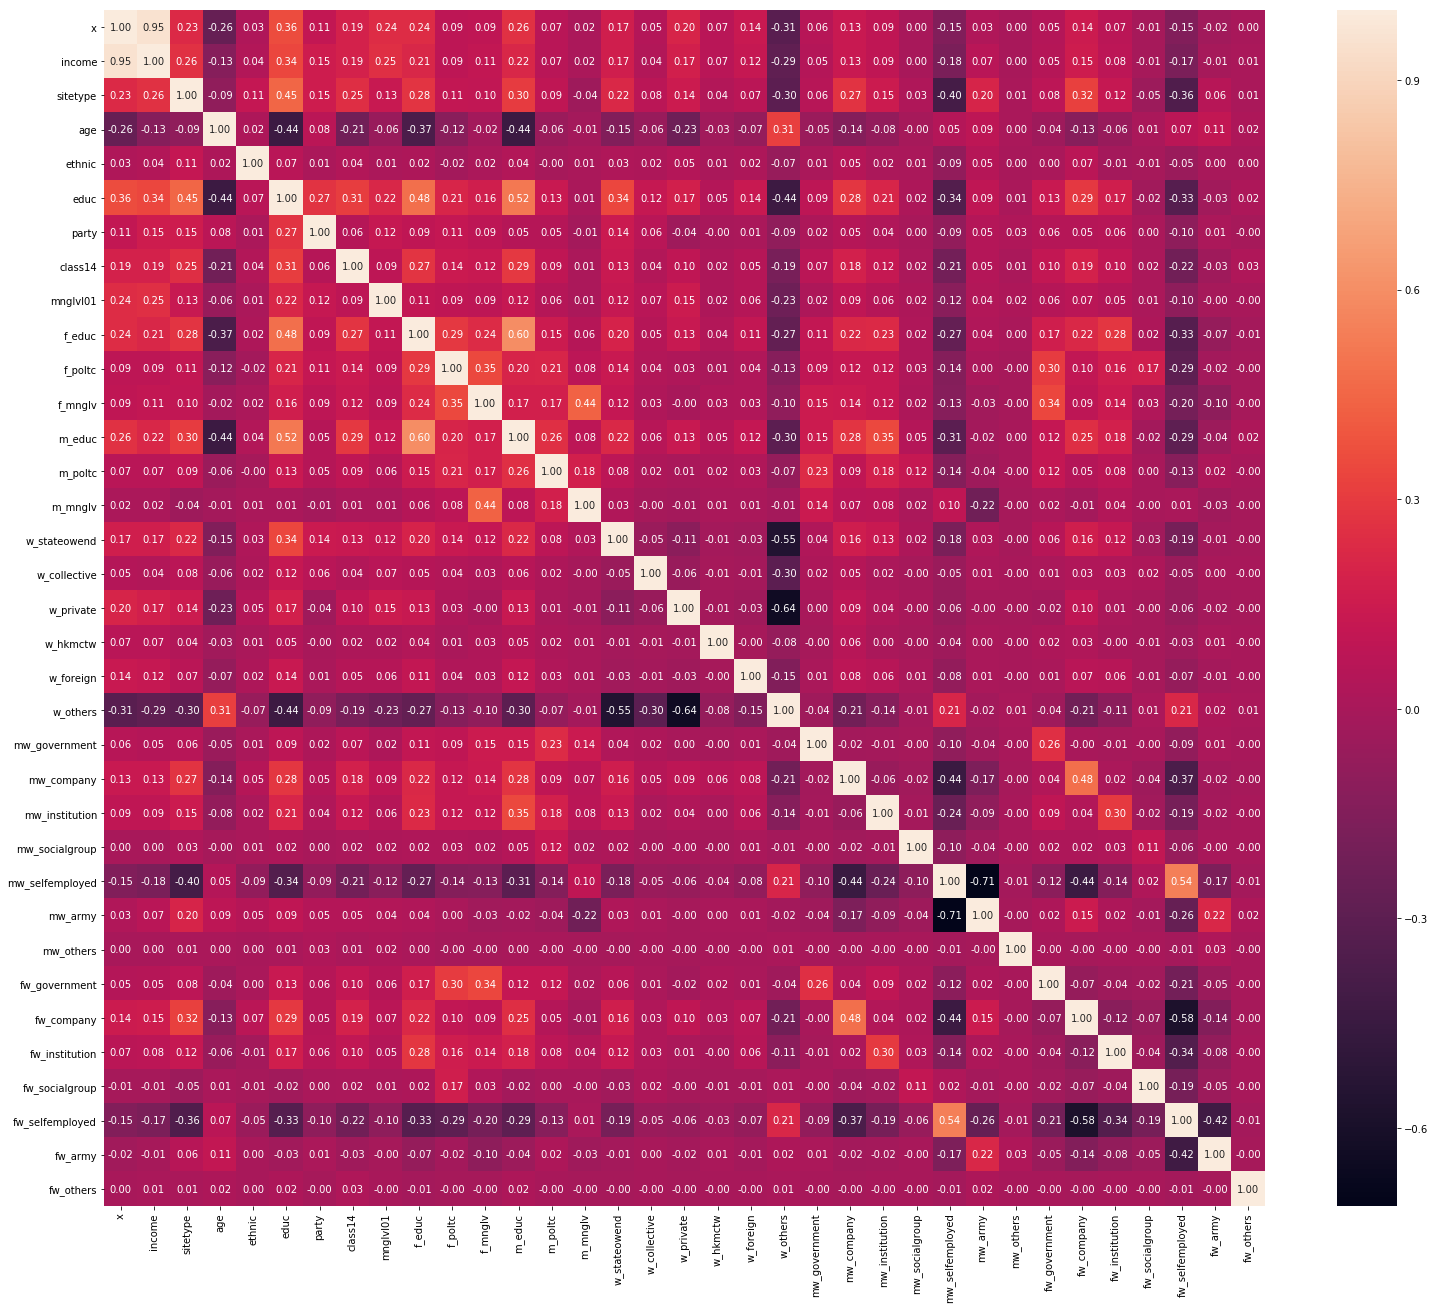

In [73]:
corr = df2.corr() 
f, ax = plt.subplots(figsize=(26, 22))
sns.heatmap(corr, annot=True, ax=ax, fmt=".2f")

In [74]:
import statsmodels.api as sm

In [75]:
X=df2.drop(['income','sitetype','x'], axis=1)
y=df2['x']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 30 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:58:25   Log-Likelihood:                 23242.
No. Observations:               11439   AIC:                        -4.642e+04
Df Residuals:                   11409   BIC:                        -4.620e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.076e+10    6.6e+10      0.315      0.753   -1.09e+11     1.5e+11
age                -0.0177      0.002     -9.767      0.000      -0.021      -0.014
ethnic              0.0003      0.001      0.311      0.756      -0.002       0.002
educ                0.0243      0.002     13.308      0.000       0.021       0.028
party               0.0049      0.001      4.639      0.000       0.003       0.007
class14             0.0097      0.002      5.991      0.000       0.007       0.013
mnglvl01            0.0313      0.002     17.068      0.000       0.028       0.035
f_educ              0.0055      0.002      2.369      0.018       0.001       0.010
f_poltc            -0.0021      0.001     -1.968      0.049      -0.004   -7.81e-06
f_mnglv             0.0084      0.003      2.524      0.012       0.002       0.015
m_educ              0.0089      0.003      2.991      0.003       0.003       0.015
m_poltc            -0.0003      0.002     -0.126      0.900      -0.005       0.004
m_mnglv            -0.0021      0.005     -0.398      0.690      -0.013       0.008
w_stateowend    -1.311e+10   4.17e+10     -0.315      0.753   -9.48e+10    6.86e+10
w_collective    -1.311e+10   4.17e+10     -0.315      0.753   -9.48e+10    6.86e+10
w_private       -1.311e+10   4.17e+10     -0.315      0.753   -9.48e+10    6.86e+10
w_hkmctw        -1.311e+10   4.17e+10     -0.315      0.753   -9.48e+10    6.86e+10
w_foreign       -1.311e+10   4.17e+10     -0.315      0.753   -9.48e+10    6.86e+10
w_others        -1.311e+10   4.17e+10     -0.315      0.753   -9.48e+10    6.86e+10
mw_government   -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
mw_company      -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
mw_institution  -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
mw_socialgroup  -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
mw_selfemployed -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
mw_army         -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
mw_others       -4.381e+09   1.39e+10     -0.315      0.753   -3.17e+10    2.29e+10
fw_government   -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
fw_company      -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
fw_institution  -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
fw_socialgroup  -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
fw_selfemployed -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
fw_army         -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
fw_others       -3.268e+09   1.04e+10     -0.315      0.753   -2.36e+10    1.71e+10
===========================================================

In [497]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=2000,random_state=0,n_jobs=-1)
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [498]:
features = X.columns[1:]

In [499]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [500]:
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) age                            0.159420
 2) ethnic                         0.148374
 3) educ                           0.116863
 4) party                          0.096647
 5) class14                        0.076614
 6) mnglvl01                       0.063031
 7) f_educ                         0.035346
 8) f_poltc                        0.034063
 9) f_mnglv                        0.027587
10) m_educ                         0.027440
11) m_poltc                        0.023002
12) m_mnglv                        0.021077
13) w_stateowend                   0.021024
14) w_collective                   0.019957
15) w_private                      0.016007
16) w_hkmctw                       0.013516
17) w_foreign                      0.012813
18) w_others                       0.011136
19) mw_government                  0.010725
20) mw_company                     0.010673
21) mw_institution                 0.009884
22) mw_socialgroup                 0.008944
23) mw_selfemployed             

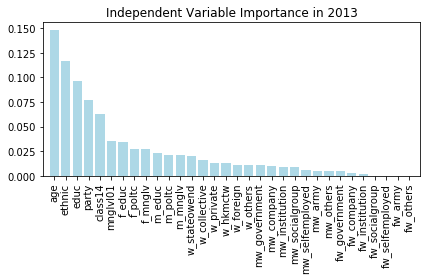

In [501]:
plt.title('Independent Variable Importance in 2013')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
plt.tight_layout()
plt.show()

In [504]:
X=df2.drop(['income','educ','age','party','mnglvl01','sitetype', \
             'w_stateowend','w_collective','w_private','w_hkmctw',
             'w_foreign','w_others'], axis=1)
y=df2['educ']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     337.6
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:46:18   Log-Likelihood:                 3054.9
No. Observations:               11439   AIC:                            -6068.
Df Residuals:                   11418   BIC:                            -5914.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2130      0.030      7.068      0.000       0.154       0.272
ethnic              0.0259      0.006      4.159      0.000       0.014       0.038
class14             0.1362      0.009     14.573      0.000       0.118       0.155
f_educ              0.2721      0.013     20.546      0.000       0.246       0.298
f_poltc             0.0255      0.006      4.186      0.000       0.014       0.037
f_mnglv             0.0229      0.019      1.182      0.237      -0.015       0.061
m_educ              0.4510      0.016     27.529      0.000       0.419       0.483
m_poltc            -0.0215      0.013     -1.598      0.110      -0.048       0.005
m_mnglv            -0.1006      0.031     -3.220      0.001      -0.162      -0.039
mw_government       0.0223      0.033      0.666      0.505      -0.043       0.088
mw_company          0.0626      0.025      2.515      0.012       0.014       0.111
mw_institution      0.0415      0.026      1.599      0.110      -0.009       0.092
mw_socialgroup     -0.0076      0.032     -0.237      0.813      -0.071       0.056
mw_selfemployed    -0.0201      0.024     -0.821      0.411      -0.068       0.028
mw_army             0.0266      0.025      1.083      0.279      -0.022       0.075
mw_others           0.0879      0.162      0.542      0.588      -0.230       0.406
fw_government       0.0133      0.026      0.507      0.612      -0.038       0.065
fw_company          0.0122      0.024      0.504      0.614      -0.035       0.060
fw_institution     -0.0057      0.025     -0.229      0.819      -0.054       0.043
fw_socialgroup     -0.0711      0.026     -2.731      0.006      -0.122      -0.020
fw_selfemployed    -0.0424      0.024     -1.761      0.078      -0.090       0.005
fw_army            -0.0367      0.024     -1.505      0.132      -0.085       0.011
fw_others           0.3435      0.162      2.118      0.034       0.026       0.661
==============================================================================
Omnibus:                     1292.977   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.114
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       3.939   Cond. No.                     1.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [505]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [506]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.416009
 2) class14                        0.183185
 3) f_educ                         0.115376
 4) f_poltc                        0.046283
 5) f_mnglv                        0.043993
 6) m_educ                         0.028548
 7) m_poltc                        0.025340
 8) m_mnglv                        0.021762
 9) mw_government                  0.018081
10) mw_company                     0.017886
11) mw_institution                 0.014136
12) mw_socialgroup                 0.013592
13) mw_selfemployed                0.010491
14) mw_army                        0.010462
15) mw_others                      0.009342
16) fw_government                  0.007548
17) fw_company                     0.007031
18) fw_institution                 0.006817
19) fw_socialgroup                 0.002473
20) fw_selfemployed                0.001277
21) fw_army                        0.000351
22) fw_others                      0.000016


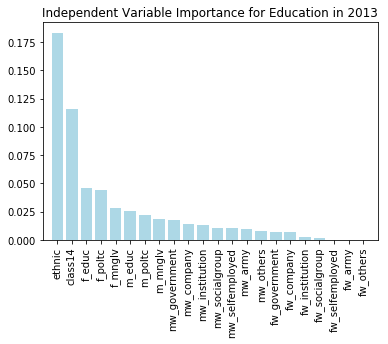

In [507]:
plt.title('Independent Variable Importance for Education in 2013')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()

In [77]:
X=df2.drop(['income','educ','age','party','mnglvl01','sitetype',
             'w_stateowend','w_collective','w_private','w_hkmctw',
             'w_foreign','w_others','x'], axis=1)
y=df2['income']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     54.45
Date:                Fri, 30 Nov 2018   Prob (F-statistic):          7.42e-208
Time:                        20:07:26   Log-Likelihood:                 22465.
No. Observations:               11439   AIC:                        -4.489e+04
Df Residuals:                   11418   BIC:                        -4.473e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0083      0.006      1.495      0.135      -0.003       0.019
ethnic              0.0025      0.001      2.224      0.026       0.000       0.005
class14             0.0188      0.002     10.947      0.000       0.015       0.022
f_educ              0.0175      0.002      7.196      0.000       0.013       0.022
f_poltc            -0.0002      0.001     -0.179      0.858      -0.002       0.002
f_mnglv             0.0156      0.004      4.408      0.000       0.009       0.023
m_educ              0.0203      0.003      6.777      0.000       0.014       0.026
m_poltc             0.0013      0.002      0.536      0.592      -0.004       0.006
m_mnglv            -0.0076      0.006     -1.319      0.187      -0.019       0.004
mw_government       0.0064      0.006      1.047      0.295      -0.006       0.018
mw_company          0.0030      0.005      0.661      0.509      -0.006       0.012
mw_institution      0.0022      0.005      0.467      0.640      -0.007       0.012
mw_socialgroup     -0.0046      0.006     -0.783      0.434      -0.016       0.007
mw_selfemployed    -0.0027      0.004     -0.603      0.547      -0.012       0.006
mw_army             0.0024      0.004      0.528      0.598      -0.006       0.011
mw_others           0.0016      0.030      0.053      0.958      -0.057       0.060
fw_government      -0.0026      0.005     -0.532      0.595      -0.012       0.007
fw_company          0.0038      0.004      0.849      0.396      -0.005       0.012
fw_institution      0.0019      0.005      0.413      0.680      -0.007       0.011
fw_socialgroup     -0.0029      0.005     -0.609      0.543      -0.012       0.006
fw_selfemployed    -0.0020      0.004     -0.457      0.647      -0.011       0.007
fw_army            -0.0008      0.004     -0.171      0.864      -0.010       0.008
fw_others           0.0109      0.030      0.365      0.715      -0.047       0.069
==============================================================================
Omnibus:                    16642.320   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10516797.621
Skew:                           8.565   Prob(JB):                         0.00
Kurtosis:                     150.552   Cond. No.                     1.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [512]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [513]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.194436
 2) class14                        0.169012
 3) f_educ                         0.158853
 4) f_poltc                        0.084388
 5) f_mnglv                        0.062098
 6) m_educ                         0.054387
 7) m_poltc                        0.046744
 8) m_mnglv                        0.029056
 9) mw_government                  0.027717
10) mw_company                     0.025473
11) mw_institution                 0.025433
12) mw_socialgroup                 0.021281
13) mw_selfemployed                0.020164
14) mw_army                        0.018514
15) mw_others                      0.018234
16) fw_government                  0.013672
17) fw_company                     0.012942
18) fw_institution                 0.010220
19) fw_socialgroup                 0.005938
20) fw_selfemployed                0.001276
21) fw_army                        0.000106
22) fw_others                      0.000056


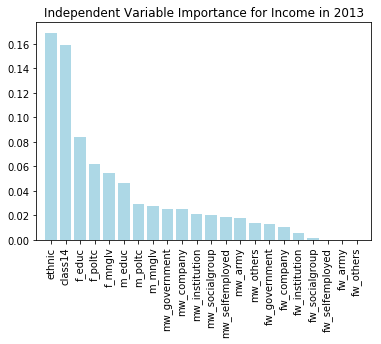

In [514]:
plt.title('Independent Variable Importance for Income in 2013')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()

In [518]:
X=df2.drop(['income','educ','age','party','mnglvl01','sitetype',
             'w_stateowend','w_collective','w_private','w_hkmctw',
             'w_foreign','w_others'], axis=1)
y=df2['mnglvl01']
X=sm.add_constant(X)
est=sm.OLS(y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mnglvl01   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     18.48
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           5.72e-65
Time:                        20:03:56   Log-Likelihood:                 4268.3
No. Observations:               11439   AIC:                            -8495.
Df Residuals:                   11418   BIC:                            -8340.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2865      0.027     10.568      0.000       0.233       0.340
ethnic              0.0014      0.006      0.246      0.806      -0.010       0.012
class14             0.0320      0.008      3.805      0.000       0.016       0.048
f_educ              0.0160      0.012      1.344      0.179      -0.007       0.039
f_poltc             0.0214      0.005      3.913      0.000       0.011       0.032
f_mnglv             0.0620      0.017      3.566      0.000       0.028       0.096
m_educ              0.0650      0.015      4.412      0.000       0.036       0.094
m_poltc             0.0115      0.012      0.950      0.342      -0.012       0.035
m_mnglv            -0.0313      0.028     -1.113      0.266      -0.086       0.024
mw_government      -0.0231      0.030     -0.769      0.442      -0.082       0.036
mw_company          0.0147      0.022      0.657      0.511      -0.029       0.059
mw_institution     -0.0017      0.023     -0.075      0.940      -0.048       0.044
mw_socialgroup      0.0231      0.029      0.796      0.426      -0.034       0.080
mw_selfemployed    -0.0237      0.022     -1.076      0.282      -0.067       0.019
mw_army            -0.0030      0.022     -0.138      0.890      -0.046       0.040
mw_others           0.3003      0.146      2.060      0.039       0.015       0.586
fw_government       0.0548      0.024      2.326      0.020       0.009       0.101
fw_company          0.0465      0.022      2.132      0.033       0.004       0.089
fw_institution      0.0514      0.022      2.308      0.021       0.008       0.095
fw_socialgroup      0.0503      0.023      2.146      0.032       0.004       0.096
fw_selfemployed     0.0454      0.022      2.097      0.036       0.003       0.088
fw_army             0.0444      0.022      2.021      0.043       0.001       0.087
fw_others          -0.0063      0.146     -0.044      0.965      -0.292       0.279
==============================================================================
Omnibus:                     3094.473   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16267.676
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                       8.324   Cond. No.                     1.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [519]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [520]:
features = X.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range((X.shape[1]-1)):
    print '%2d) %-*s% f' % (f + 1, 30, features[f], importances[indices[f]])

 1) ethnic                         0.199406
 2) class14                        0.194772
 3) f_educ                         0.148139
 4) f_poltc                        0.080995
 5) f_mnglv                        0.051887
 6) m_educ                         0.042828
 7) m_poltc                        0.037295
 8) m_mnglv                        0.032586
 9) mw_government                  0.030352
10) mw_company                     0.028738
11) mw_institution                 0.025733
12) mw_socialgroup                 0.025287
13) mw_selfemployed                0.019231
14) mw_army                        0.018517
15) mw_others                      0.017436
16) fw_government                  0.013978
17) fw_company                     0.012820
18) fw_institution                 0.010688
19) fw_socialgroup                 0.005969
20) fw_selfemployed                0.002958
21) fw_army                        0.000371
22) fw_others                      0.000016


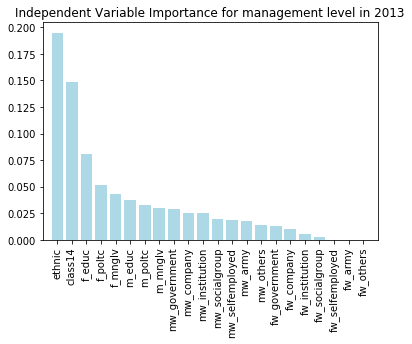

In [523]:
plt.title('Independent Variable Importance for management level in 2013')
plt.bar(range((X.shape[1]-1)),
        importances[indices][1:],
        color='lightblue',
        align='center')
plt.xticks(range((X.shape[1]-1)), features, rotation = 90)
plt.xlim([-1, (X.shape[1]-1)])
#plt.tight_layout()
plt.show()

In [525]:
df13me1.describe()

,sitetype,ethnic,educ,income,party,class14,mnglvl01,wkunit01,f_educ,f_poltc,f_mnglv,f_wkunit,m_educ,m_poltc,m_mnglv,m_wkunit,age
count,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000
mean,3.027275,0.914241,4.931288,21326.384474,0.101495,3.073258,2.039164,5.104117,2.990821,0.124836,0.336568,4.345048,2.239007,0.020369,0.202116,4.842818,48.597255
std,1.786504,0.280020,3.038196,35533.342884,0.301996,1.786678,0.507890,1.687694,2.260489,0.330547,0.799557,1.357985,1.881211,0.141265,0.457563,1.112464,16.386729
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,17.000000
25%,1.000000,1.000000,3.000000,1800.000000,0.000000,2.000000,2.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,5.000000,36.000000
50%,3.000000,1.000000,4.000000,12000.000000,0.000000,3.000000,2.000000,6.000000,3.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,48.000000
75%,5.000000,1.000000,6.000000,30000.000000,0.000000,4.000000,2.000000,6.000000,4.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,5.000000,61.000000
max,5.000000,1.000000,13.000000,1000000.000000,1.000000,10.000000,4.000000,6.000000,13.000000,1.000000,7.000000,7.000000,13.000000,1.000000,7.000000,7.000000,97.000000


In [68]:
df13me1['x'] = df13me1['income']/df13me1['age']